# Logic testing (will be deleted)

In [39]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *


## Creazione dell environment

In [40]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          . ...           ..}                                   
                          .`..`     .` .....}                                   
                          .....   ........                                      
                          ....` .......`    }                                   
                          .

In [41]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

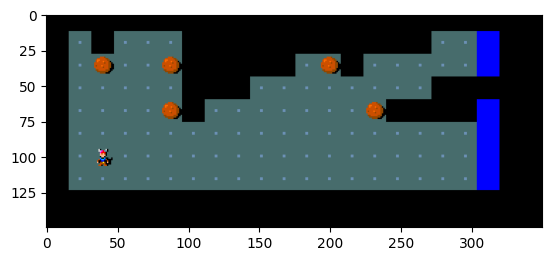

In [42]:
plt.imshow(state['pixel'][100:250, 400:750]) #Immagine ristretta con range [y][x]

In [44]:
game_map = state['chars']
game = state['pixel']

In [ ]:
image = plt.imshow(game[25:300, :475])
player_positions = []
for action in [0,0]:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, :])
    player_positions.append(get_player_location(game_map))
    time.sleep(0.5)
    
    if is_player_same_position(player_positions[len(player_positions)-1], player_positions[len(player_positions)-2]):
        avoid_the_obstacle(game_map, get_player_location(game_map), action, env)

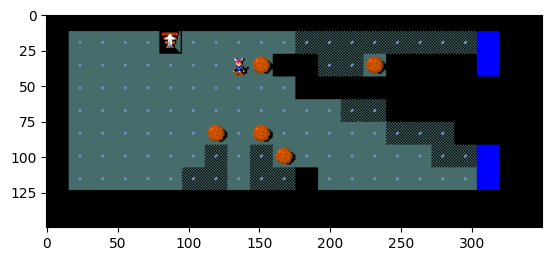

In [15]:
plt.imshow(state['pixel'][100:250, 400:750])